In [1]:
# carregar bibliotecas necessárias e realizar leitura do arquivo dadosDesafio.xlsx
import pandas as pd
import re
import datetime as dt
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.drawing.image import Image
import os

dados_trimestre_df = pd.read_excel(r'.\dadosDesafio.xlsx')

#print(dados_trimestre_df)


##### Tratamento dos dados: 
###### - transformar todos para maiúsculo, tanto coluna quanto linha;
###### - colocar colunas em snake_case;
###### - remover acentos;
###### - trocar abreviações por nomes completos;
###### - remover espaços em branco no início e no fim das células;
###### - remover vírgulas;
###### - separar número da casa do nome da rua criando nova coluna rua e nova coluna número;
###### - demonstrar a **média** e os valores **mínimos**  e **máximos** dos juros e do valor de aluguel;
###### - por fim, salvar nova planilha.

In [2]:
#tratando as colunas
dados_trimestre_df.columns = dados_trimestre_df.columns.str.strip().str.replace(' ', '_').str.replace('ç', 'c').str.replace('á', 'a').str.replace('ã', 'a').str.replace('é', 'e').str.replace('ê', 'e').str.replace('ó', 'o').str.replace('ô','o').str.upper().str.replace('END.', 'ENDERECO').str.replace('COD_IMOVEL', 'ID').str.replace('(%)', 'ATRASO').str.replace('VCTO','VENCIMENTO').str.replace('OUT', 'OUTUBRO').str.replace('NOV','NOVEMBRO').str.replace('DEZ','DEZEMBRO')

# Renomear as colunas 
#convertendo a coluna id para string, juros_atraso para booleano e tratando as linhas das colunas
dados_trimestre_df['ID'] = dados_trimestre_df['ID'].astype(str).str.zfill(2)
dados_trimestre_df['LOCADOR'] = dados_trimestre_df['LOCADOR'].str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace('ç', 'c').str.replace('á', 'a').str.replace('ã', 'a').str.replace('é', 'e').str.replace('ê', 'e').str.replace('ó', 'o').str.replace('ô','o').str.upper()
dados_trimestre_df['LOCATARIO'] = dados_trimestre_df['LOCATARIO'].str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace('ç', 'c').str.replace('á', 'a').str.replace('ã', 'a').str.replace('é', 'e').str.replace('ê', 'e').str.replace('ó', 'o').str.replace('ô','o').str.upper()
dados_trimestre_df['ENDERECO_IMOVEL'] = dados_trimestre_df['ENDERECO_IMOVEL'].str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace('ç', 'c').str.replace('á', 'a').str.replace('ã', 'a').str.replace('é', 'e').str.replace('ê', 'e').str.replace('ó', 'o').str.replace('ô','o').str.replace('AV.', 'AVENIDA').str.replace(',','').str.upper()
dados_trimestre_df['ALUGUEL'] = dados_trimestre_df['ALUGUEL'].astype(float)
dados_trimestre_df['JUROS_ATRASO'] = dados_trimestre_df['JUROS_ATRASO'].astype(float)

# convertendo as colunas de data de pandas para datetime caso seja necessário realizar cálculos com elas futuramente:
dados_trimestre_df['OUTUBRO'] = pd.to_datetime(dados_trimestre_df['OUTUBRO'], format='%d/%m/%y', errors='coerce')
dados_trimestre_df['NOVEMBRO'] = pd.to_datetime(dados_trimestre_df['NOVEMBRO'], format='%d/%m/%y', errors='coerce')
dados_trimestre_df['DEZEMBRO'] = pd.to_datetime(dados_trimestre_df['DEZEMBRO'], format='%d/%m/%y', errors='coerce')
'''REFERENTE AO DIA_VENCIMENTO AINDA NÃO CONSEGUI ENTENDER COMO POSSO UTILIZAR 
   ESSE NÚMERO  PARA REALIZAR POSSÍVEIS CÁLCULOS FUTURAMENTE COM BASE NA DATA 
   DE PAGAMENTO. SE EU TRANSFORMAR ESSA COLUNA EM DATETIME, ELA IRÁ ME RETORNAR
   UMA DATA COMPLETA E NÃO É ISSO QUE EU QUERO. DESEJO QUE CONSTE APENAS O DIA MAS
   QUE A APLICAÇÃO CONSIDERE A COLUNA COMO DATA. 
   POR ENQUANTO DEIXAREI COMO NÚMERO INTEIRO:'''
dados_trimestre_df['DIA_VENCIMENTO'] = dados_trimestre_df['DIA_VENCIMENTO'].apply(lambda x: f'{x:02}')

# ajustando formato de data:
dados_trimestre_df['OUTUBRO'] = dados_trimestre_df['OUTUBRO'].dt.strftime('%d/%m/%y')
dados_trimestre_df['NOVEMBRO'] = dados_trimestre_df['NOVEMBRO'].dt.strftime('%d/%m/%y')
dados_trimestre_df['DEZEMBRO'] = dados_trimestre_df['DEZEMBRO'].dt.strftime('%d/%m/%y')






In [3]:
# criando função para extrair o número do endereço:

def extracao_numero_endereco(ENDERECO_IMOVEL):
  # usei expressão para encontrar os números dentro da string:
  buscador_numero = re.search(r'\d+$', ENDERECO_IMOVEL)
  # criando estrutura condicional para agrupar os números encontrados na coluna:
  if buscador_numero:
    numero = buscador_numero.group()
    # Removendo os números da coluna ENDERECO_IMOVEL:
    rua_endereco_imovel = ENDERECO_IMOVEL.replace(numero, '').strip()
    return numero, rua_endereco_imovel
  else:
    return 'S/N', ENDERECO_IMOVEL




In [4]:
# Aplicar a função para criar duas novas colunas com o nome: ENDERECO_IMOVEL e NUMERO_IMOVEL:
dados_trimestre_df['NUMERO_IMOVEL'], dados_trimestre_df['ENDERECO_IMOVEL'] = zip(*dados_trimestre_df['ENDERECO_IMOVEL'].apply(extracao_numero_endereco))

# Caso fosse necessário renomear as colunas, seria feito dessa forma:
# dados_trimestre_df = dados_trimestre_df.rename(columns={'ID' : 'ID_RENOMEADO', 'LOCADOR' : 'LOCADOR_RENOMEADO', 'LOCATARIO' : 'LOCATARIO_RENOMEADO', 'ENDERECO_IMOVEL' : 'ENDERECO_IMOVEL_RENOMEADO'})




# Ordenar as colunas OU SELECIONAR COLUNAS ESPECIFICAS no arquivo:
colunas_ordenadas = ['ID' , 'ENDERECO_IMOVEL' , 'NUMERO_IMOVEL' , 'LOCADOR' , 'LOCATARIO' , 'DIA_VENCIMENTO' , 'ALUGUEL' , 'JUROS_ATRASO' , 'OUTUBRO' , 'NOVEMBRO' , 'DEZEMBRO']
dados_trimestre_df = dados_trimestre_df[colunas_ordenadas]


#SALVAR O DATAFRAME COM OS TRATAMENTOS ADEQUADOS:
dados_trimestre_df.to_excel('dadosTratados.xlsx', index=False)



In [5]:
# demonstrando a **média** e os valores **mínimos**  e **máximos** dos juros e do valor de aluguel;
estatistica_descritiva_juros = dados_trimestre_df['JUROS_ATRASO'].describe()
estatistica_descritiva_aluguel = dados_trimestre_df['ALUGUEL'].describe()


# descrição coluna aluguel:
media_aluguel = estatistica_descritiva_aluguel.loc['mean']
minimo_aluguel = estatistica_descritiva_aluguel.loc['min']
maximo_aluguel = estatistica_descritiva_aluguel.loc['max']

# descrição coluna juros:
media_juros = estatistica_descritiva_juros.loc['mean']
minimo_juros = estatistica_descritiva_juros.loc['min']
maximo_juros = estatistica_descritiva_juros.loc['max']

relatório_trimestre_df = pd.DataFrame({
    'COLUNAS': ['ALUGUEL', 'JUROS'],
    'MEDIA': [media_aluguel, media_juros],
    'MINIMO': [minimo_aluguel, minimo_juros],
    'MAXIMO': [maximo_aluguel, maximo_juros]
})


#print(relatório_trimestre_df)

<Figure size 640x480 with 0 Axes>

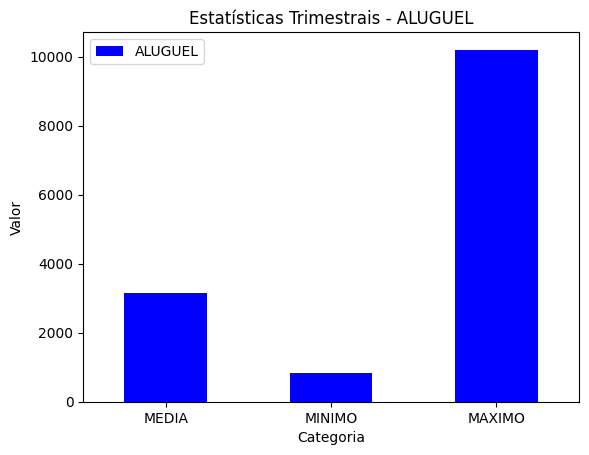

<Figure size 640x480 with 0 Axes>

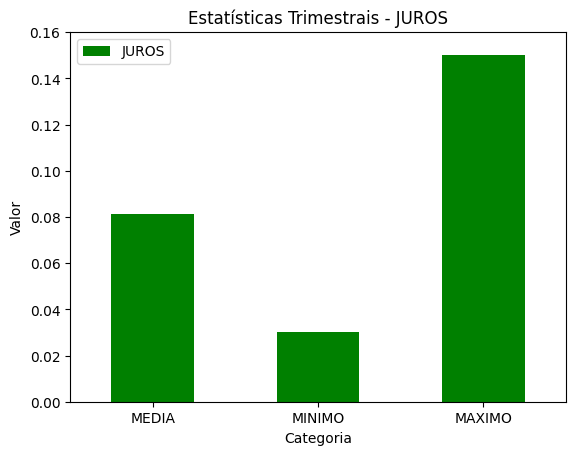

In [6]:
#criando gráfico para apresentação ao cliente:
# Suprimir os avisos de depreciação do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Criar DataFrames separados para ALUGUEL e JUROS
grafico_aluguel_df = pd.DataFrame(
    relatório_trimestre_df[relatório_trimestre_df['COLUNAS'] == 'ALUGUEL'][['MEDIA', 'MINIMO', 'MAXIMO']].values.T,
    index=['MEDIA', 'MINIMO', 'MAXIMO'],
    columns=['ALUGUEL']
)

grafico_juros_df = pd.DataFrame(
    relatório_trimestre_df[relatório_trimestre_df['COLUNAS'] == 'JUROS'][['MEDIA', 'MINIMO', 'MAXIMO']].values.T,
    index=['MEDIA', 'MINIMO', 'MAXIMO'],
    columns=['JUROS']
)

# Gráfico para ALUGUEL
plt.figure()
# Plotar o gráfico para ALUGUEL
ax1 = grafico_aluguel_df.plot(kind='bar', rot=0, color=['blue'])
ax1.set_title('Estatísticas Trimestrais - ALUGUEL')
ax1.set_ylabel('Valor')
ax1.set_xlabel('Categoria')
ax1.legend(loc='upper left')


# Salvar o gráfico ALUGUEL em um arquivo de imagem:

plt.savefig('grafico_aluguel.png')
#plt.close()  # Fechar a figura para liberar recursos


# Gráfico para JUROS
plt.figure()


# Plotar o gráfico para JUROS
ax2 = grafico_juros_df.plot(kind='bar', rot=0, color=['green'])
ax2.set_title('Estatísticas Trimestrais - JUROS')
ax2.set_ylabel('Valor')
ax2.set_xlabel('Categoria')
ax2.legend(loc='upper left')
ax2.set_ylim(0, 0.16)

# Salvar o gráfico JUROS em um arquivo de imagem:
plt.savefig('grafico_juros.png')
#plt.close()  # Fechar a figura para liberar recursos


# Exibir os gráficos:
plt.show()


In [7]:
# Criar um arquivo Excel usando openpyxl
wb = Workbook()

# Adicionar uma planilha vazia
ws = wb.active
ws.title = 'Imagens'

# Adicionar as imagens ao Excel
img_aluguel = Image('grafico_aluguel.png')
img_aluguel.anchor = 'A1'  # Coloque a imagem na célula A1

img_juros = Image('grafico_juros.png')
img_juros.anchor = 'L1'  # Coloque a imagem na célula L1

ws.add_image(img_aluguel)
ws.add_image(img_juros)

# Salvar o arquivo Excel
wb.save('Relatório_Trimestral.xlsx')